In [31]:
import os
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Drumsticks - BatDatacsv.csv")
y = df["Fantasy"]
df.drop("Fantasy", axis = 1, inplace = True)
y = pd.DataFrame(y)

In [8]:
y.loc[y["Fantasy"] < 0, "Fantasy_Class"] = 1
y.loc[(y["Fantasy"] < 40) & (y["Fantasy"] >= 0), "Fantasy_Class"] = 2
y.loc[(y["Fantasy"] < 80) & (y["Fantasy"] >= 40), "Fantasy_Class"] = 3
y.loc[(y["Fantasy"] < 120) & (y["Fantasy"] >= 80), "Fantasy_Class"] = 4
y.loc[y["Fantasy"] >= 120, "Fantasy_Class"] = 5

In [10]:
encoder_y = LabelEncoder()
y["Fantasy_Class"] = encoder_y.fit_transform(y["Fantasy_Class"])
y.drop("Fantasy", axis = 1, inplace = True)

# Saving the encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder_y, f)

# Loading the encoder
with open('label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

In [13]:
cols = ['ID', 'Opposition', 'Ground', 'TossResult', 'MatchTime', 'Tournament', 'Role',
       'Country', 'Batting Hand']

encoders = {}  # Dictionary to store encoders

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store the encoder for the column

# Save all encoders to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [14]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(df, y)

In [15]:
x_resampled

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
0,2,6,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
1,2,3,0.000000,2,1,235,91,0,2,0,...,1.092700,25.300000,13.600000,15.900000,1,2,3,5,1,25
2,5,6,0.000000,2,1,66,36,0,0,0,...,1.092700,32.600000,16.500000,24.500000,6,1,1,8,1,23
3,5,6,173.684211,1,1,281,75,0,2,1,...,1.092700,25.500000,20.300000,28.600000,6,1,1,8,1,23
4,5,6,150.000000,2,1,40,33,0,2,0,...,1.092700,27.900000,17.300000,26.700000,6,1,1,8,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60265,69,5,147.575329,1,0,206,138,1,1,0,...,3.547806,22.132124,14.392059,22.822180,9,1,3,3,0,26
60266,17,6,144.014199,1,1,48,181,1,2,0,...,2.014379,29.298918,24.642466,27.876061,5,1,3,3,1,32
60267,155,6,142.382132,2,0,12,82,1,0,1,...,2.765026,22.033499,16.035145,15.235145,4,1,1,5,0,21
60268,37,3,150.709267,2,1,101,36,1,2,1,...,3.483787,22.800000,17.000000,21.900000,6,2,3,8,1,27


In [16]:

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.1, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [23]:
print("Features and their value ranges in x_train:")
for column in x_train.columns:
    min_value = x_train[column].min()
    max_value = x_train[column].max()
    print(f"{column}: Range = [{min_value}, {max_value}]")

Features and their value ranges in x_train:
ID: Range = [0, 195]
GameFormat: Range = [3, 6]
SR: Range = [0.0, 480.0]
BattingInnings: Range = [1, 2]
IsOut: Range = [0, 1]
Opposition: Range = [0, 298]
Ground: Range = [0, 190]
TossResult: Range = [0, 1]
MatchTime: Range = [0, 2]
isTossWon: Range = [0, 1]
isHomeGround: Range = [0, 1]
GroundWL: Range = [0.0, 4.375]
GroundRPO: Range = [0.0, 11.15]
GroundAvg: Range = [0.0, 55.0]
TossWL: Range = [0.0, 6.0]
TossRPO: Range = [0.0, 11.65]
TossAvg: Range = [0.0, 83.5]
inningsWL: Range = [0.0, 4.666]
inningsRPO: Range = [5.36, 11.15]
inningsAverage: Range = [11.7, 55.0]
Average: Range = [0.0, 180.0]
Innings: Range = [0, 582]
Centuries: Range = [0, 13]
Fifties: Range = [0, 134]
Zeros: Range = [0, 49]
Consistency: Range = [0.9025, 4.5716]
Form: Range = [0.9025, 3.8155]
Venue: Range = [1.3382, 4.7093]
Opps: Range = [1.0927, 4.6965]
MaxTemp: Range = [9.7, 45.9]
MinTemp: Range = [0.1, 32.4]
MaxWind: Range = [4.3, 54.6]
Tournament: Range = [0, 13]
Battin

In [24]:
y

,Fantasy_Class
0,0
1,0
2,2
3,0
4,1
...,...
24273,1
24274,1
24275,4
24276,4


In [25]:
x_train

,ID,GameFormat,SR,BattingInnings,IsOut,Opposition,Ground,TossResult,MatchTime,isTossWon,...,Opps,MaxTemp,MinTemp,MaxWind,Tournament,BattingOrder,Role,Country,Batting Hand,Age
34848,39,5,147.625144,1,1,68,68,0,0,0,...,2.494601,26.266674,18.062906,19.751582,8,2,3,8,0,32
39675,28,6,143.972750,1,1,105,183,1,0,0,...,2.428228,33.000000,19.400000,11.700000,6,1,0,5,1,31
58995,21,3,156.095190,1,1,241,1,1,0,0,...,4.212187,17.500000,12.700000,18.200000,1,2,0,1,1,31
39210,107,3,145.201767,1,1,70,2,1,2,0,...,3.100904,37.025664,22.784956,15.383184,1,2,3,6,0,24
22845,168,6,135.854342,1,1,17,85,0,2,1,...,3.658100,29.700000,22.500000,16.100000,1,3,0,5,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,152,6,129.559208,1,0,89,106,1,0,0,...,1.923775,28.859837,17.547373,11.755400,6,1,1,6,0,24
38158,107,3,145.310809,1,1,70,2,1,2,0,...,3.062300,37.452713,22.756486,14.215917,1,2,3,6,0,24
860,5,6,117.508417,2,1,138,91,1,0,1,...,1.907900,24.400000,14.400000,17.200000,11,2,1,8,1,28
15795,97,6,141.728798,1,1,184,44,1,0,0,...,2.998300,11.000000,3.600000,20.600000,11,2,1,7,1,26


In [29]:

# Check the distribution of classes
class_distribution = y_train.value_counts()

# Print the class distribution
print("Class distribution in y_train:")
print(class_distribution)

# Optionally, calculate the percentage of each class
class_percentage = y_train.value_counts(normalize=True) * 100
print("\nClass percentage in y_train:")
print(class_percentage)

Class distribution in y_train:
Fantasy_Class
3                10873
1                10863
2                10860
0                10831
4                10816
Name: count, dtype: int64

Class percentage in y_train:
Fantasy_Class
3                20.044983
1                20.026547
2                20.021017
0                19.967553
4                19.939900
Name: proportion, dtype: float64


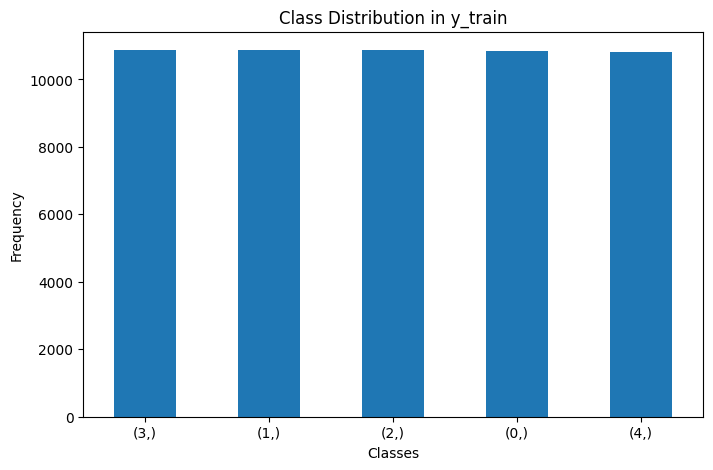

In [33]:
# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in y_train')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [28]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Build the deep learning model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# For multi-class classification, use:
# model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# For multi-class classification, use:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train)
test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy[1]:.4f}')
print(f'Testing Accuracy: {test_accuracy[1]:.4f}')

Epoch 1/50


/Users/ghazalaamin/Documents/Dream-11-Fantasy-Points-Prediction/dream_11_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1357/1357 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2087 - loss: -47.6960 - val_accuracy: 0.2180 - val_loss: -430.9533
Epoch 2/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.2160 - loss: -676.3436 - val_accuracy: 0.2293 - val_loss: -1561.5967
Epoch 3/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.2203 - loss: -1936.5507 - val_accuracy: 0.2329 - val_loss: -3236.3459
Epoch 4/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.2141 - loss: -3693.6052 - val_accuracy: 0.2318 - val_loss: -5321.2373
Epoch 5/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.2165 - loss: -5938.2529 - val_accuracy: 0.2334 - val_loss: -7890.2300
Epoch 6/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.2134 - loss: -8625.6836 - val_accuracy: 0.2327 - val_loss: -10903.7686
Epoch 7/50
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.2181 - loss: -11591.3086 - val_accuracy: 0.2338 - val_loss: -14128.0430
Epoch 8/50
1357/1357 ━━━━━━━━━━━━━